# BFS vs DFS Traversal

This notebook compares Breadth-First Search (BFS) and Depth-First Search (DFS).
Both algorithms are applied to the same graph so we can observe the difference in their traversal order.

In [1]:
# BFS implementation using queue
from collections import deque

def run_bfs(graph, start):
    visited = set()
    sequence = []
    q = deque([start])

    while q:
        node = q.popleft()
        if node not in visited:
            visited.add(node)
            sequence.append(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    q.append(neighbor)
    return sequence

In [2]:
# DFS implementation using recursion
def run_dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)

    for neighbor in graph[start]:
        if neighbor not in visited:
            run_dfs(graph, neighbor, visited)
    return visited

In [3]:
# Sample graph for comparison
graph_example = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

bfs_output = run_bfs(graph_example, 'A')
dfs_output = list(run_dfs(graph_example, 'A'))

print("BFS Traversal Order:", bfs_output)
print("DFS Traversal Order:", dfs_output)

BFS Traversal Order: ['A', 'B', 'C', 'D', 'E', 'F']
DFS Traversal Order: ['F', 'A', 'E', 'D', 'B', 'C']


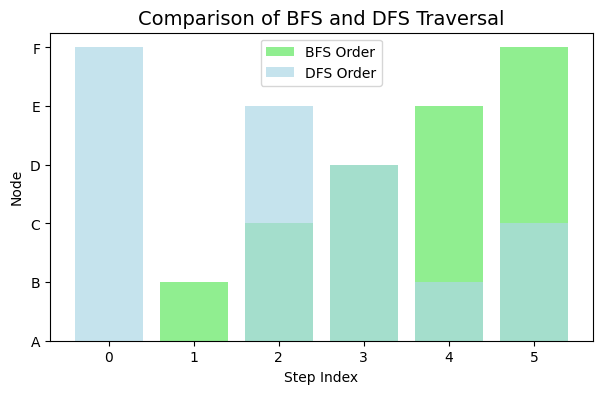

In [4]:
# Visualization of BFS vs DFS results using bar chart
import matplotlib.pyplot as plt

labels = list(graph_example.keys())

plt.figure(figsize=(7,4))
plt.bar(range(len(bfs_output)), bfs_output, color='lightgreen', label='BFS Order')
plt.bar(range(len(dfs_output)), dfs_output, color='lightblue', alpha=0.7, label='DFS Order')
plt.title("Comparison of BFS and DFS Traversal", fontsize=14)
plt.xlabel("Step Index")
plt.ylabel("Node")
plt.legend()
plt.show()